# Mean Shifting: Guessing the Number of Classes

- Useful for estimating the number of clusters in a K-Means run
- Non-parametric, i.e. makes no assumptions about the underlying distribution (as opposed to the Gaussian classifiers)

The whole feature space is a probability density function.  Each datum in the training set is assumed to come from a probability distribution, with each cluster corresponding to a local maximum in the distribution.

In [13]:
from itertools import cycle
import numpy
from matplotlib import pyplot
from sklearn.cluster import MeanShift, estimate_bandwidth

In [14]:
data = numpy.loadtxt("data_clustering.txt", delimiter=",")

## Estimating Bandwidth

Bandwidth is a parameter of the input data, which is used to determine how many clusters there will be at the end.

In [34]:
bandwidth = estimate_bandwidth(data, quantile=0.1, n_samples=len(data), n_jobs=-1)
bandwidth

1.3044799765090382

## Training the Model

In [35]:
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
meanshift.fit(data)
centers = meanshift.cluster_centers_
num_centers = len(centers)
unique_labels = numpy.unique(meanshift.labels_)
labels = meanshift.labels_

print("{0} Clusters: (Labels {1})".format(num_centers, unique_labels))
print(centers)

5 Clusters: (Labels [0 1 2 3 4])
[[ 2.95568966  1.95775862]
 [ 7.17563636  2.18145455]
 [ 2.17603774  8.03283019]
 [ 5.97960784  8.39078431]
 [ 4.81044444  5.07111111]]


## Plotting It

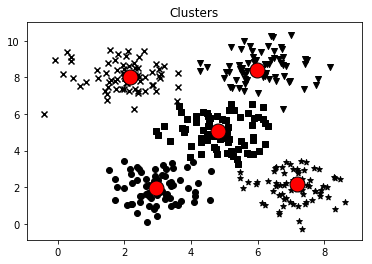

In [36]:
pyplot.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_centers), markers):
    # For each cluster...
    pyplot.scatter(data[labels == i, 0], data[labels == i, 1], marker=marker, color='black')
    center = centers[i]
    pyplot.plot(center[0], center[1], marker='o', markerfacecolor='red', markeredgecolor='black', markersize=15)

pyplot.title("Clusters")
pyplot.show()